In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from unwarping_functions import *

## Illustrative Figures
This part of the notebook generates illustrative figures of the paper related to unwarping of periodic bandlimitted functions.

In [2]:
# Settings
K = 3
np.random.seed(10)
a = np.random.uniform(-1, 1, 2*K+1); a = (a + a[::-1]) / 2.
b = 1.6
font_size = 8

s = 1.6728155007383276


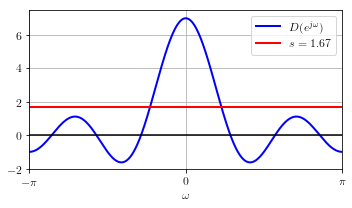

In [3]:
# Example for DIRAChlet
# Settings
T = 0.5
alpha = 2 * np.pi / (2*K+1) * T * b

# DIRAChlet
theta = np.arange(-K, K+1) * alpha % (2*np.pi)
s = np.real(np.sum(np.exp(1j * theta)))
print("s = " + str(s))

def Y_fun(w):
    return np.sin(w * (K+0.5)) / np.sin(w/2.)

w = np.linspace(-np.pi, np.pi, 1000)
Y = Y_fun(w)
fig = plt.figure(figsize=(5, 3))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

ax = fig.add_subplot(1,1,1)
ax.plot(w, Y, label='$D(e^{j\omega})$', color='b', linewidth=2)
ax.axhline(y=s, color='r', linewidth=2, label='$s = ' + str(round(s, 2)) + '$')
ax.axhline(y=0, color='k')
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels(['$-\pi$', '$0$', '$\pi$'], fontsize=12)
ax.set_yticks([-2, 0, 2, 4, 6])
ax.set_yticklabels(['$-2$', '$0$', '$2$', '$4$', '$6$'], fontsize=12)
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-2, 7.5)
ax.set_xlabel('$\omega$', fontsize=12)
plt.legend(fontsize=12)
ax.grid()
plt.tight_layout()
plt.savefig('dirachlet_s1.pdf', format = 'pdf')


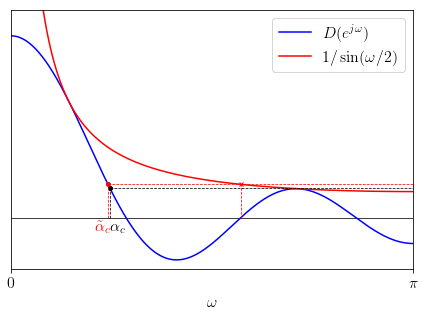

In [4]:
# Envelope

w1 = np.linspace(0.001, np.pi, 1000)
w2 = np.linspace(.2, np.pi, 1000)
Y = Y_fun(w1)

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(111)

plt.axhline(y=0, color='k', linewidth=0.75)

# curves
plt.plot(w1, Y, color='b', label='$D(e^{j\omega})$')
plt.plot(w2, 1/np.sin(w2/2.), color='r', label='$1/\sin(\omega/2)$')
# alpha_c and alpha_cl lines
x_c = 3*np.pi / (2 * K + 1) - 0.575
plt.plot([x_c, np.pi], [np.abs(Y_fun(x_c)), np.abs(Y_fun(x_c))], color='k', linestyle='--', linewidth=0.75)
plt.plot([x_c, x_c], [0, Y_fun(x_c)], color='k', linewidth=0.75, linestyle='--')
plt.plot([x_c], [Y_fun(x_c)], marker='o', color='k', markersize=4)
ax.text(x_c, -.55,'$\\alpha_c$', fontsize=16)

x = 4*np.pi / (2 * K + 1)
plt.plot([x], [1 / np.sin(x/2)], marker='x', color='r', markersize=4)
plt.plot([x, x], [0, 1 / np.sin(x/2)], color='r', linewidth=0.75, linestyle='--')
x = x_c - 0.016
plt.plot([x, x], [0, Y_fun(x)], color='r', linewidth=0.75, linestyle='--')
plt.plot([x, np.pi], [np.abs(Y_fun(x)), np.abs(Y_fun(x))], color='r', linestyle='--', linewidth=0.75)
plt.plot([x], [Y_fun(x)], marker='o', color='r', markersize=4)
ax.text(x-.1, -.55,'$\\tilde{\\alpha}_{c}$', color='r', fontsize=16)

ax.set_xticks([0, np.pi])
ax.set_xticklabels(['$0$', '$\pi$'], fontsize=16)
ax.set_yticks([])
ax.set_yticklabels([])

plt.xlabel('$\omega$', fontsize=16)
plt.legend(fontsize=16)
plt.ylim((-2, 8))
plt.xlim((0, np.pi))
plt.tight_layout()
plt.savefig('dirachlet_s_envelope.pdf', format='pdf')


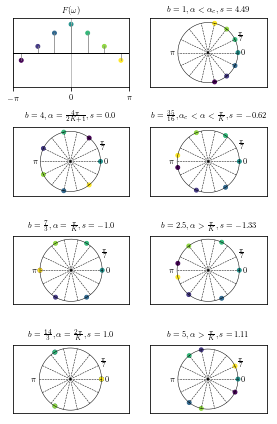

In [5]:
# Diracs on circle

N = 1000
theta_grid = np.linspace(-np.pi, np.pi, N, endpoint=False)
x = np.cos(theta_grid)
y = np.sin(theta_grid)
z = np.zeros(len(theta_grid))

np.random.seed(3111111)
a = np.random.uniform(-1, 1, 2*K+1); a = (a + a[::-1]) / 2.
T = 0.5
b = [1, 4, 35/16.0, 7/3.0, 2.5, 14/3., 5]
label_distance = 1.18
alpha = [2 * np.pi / (2*K+1) * T * _b for _b in b]

def periodize_angle(theta):
    result = np.array(theta % (2 * np.pi))
    idx = result > np.pi
    result[idx] -= 2 * np.pi
    return result

theta_supposed = [np.arange(-K, K+1) * 2 * np.pi / (2*K+1)] + [periodize_angle(np.arange(-K, K+1) * _alpha) for _alpha in alpha]
s_list = [round(find_s(theta),2) for theta in theta_supposed[1:]]
names = ["$F(\omega)$",
         "$b = 1, \\alpha < \\alpha_{c}$",
         "$b = 4, \\alpha = \\frac{4\pi}{2K+1}$",
         "$b = \\frac{35}{16}, \\alpha_{c} < \\alpha < \\frac{\pi}{K}$",
         "$b = \\frac{7}{3}, \\alpha = \\frac{\pi}{K}$",
         "$b = 2.5, \\alpha > \\frac{\pi}{K}$",
         "$b = \\frac{14}{3}, \\alpha = \\frac{2\pi}{K}$",
         "$b = 5, \\alpha > \\frac{\pi}{K}$"]
names = [names[0]] + [nn + '$, s = ' + str(ss) + '$' for nn, ss in zip(names[1:], s_list)]
fig = plt.figure(figsize=(4,6))
for i in range(len(theta_supposed)):
    ax = fig.add_subplot(4, 2, i+1)
    if i == 0:
        for j in range(len(theta_supposed[i])):
            ax.plot([theta_supposed[i][j], theta_supposed[i][j]], [0, a[j]], 'gray', linewidth=.75)
        ax.scatter(theta_supposed[i], a, c=np.arange(0, 2*len(a), 2), s=15, alpha=1)
        ax.set_ylim(-1, 1)
        ax.set_xlim(-np.pi, np.pi)
        ax.set_xticks([-np.pi, 0, np.pi])
        ax.set_xticklabels(['$-\pi$', '$0$', '$\pi$'], fontsize=font_size)
        ax.set_yticks([])
        ax.set_yticklabels([], fontsize=font_size)
        ax.grid()
        ax.axhline(y=0, color='k', linewidth=1)
    else:
        theta_circle = np.linspace(0, 2*np.pi, 1000, endpoint=False)
        ax.plot(np.cos(theta_circle), np.sin(theta_circle), linewidth=0.5, color='black')
        ax.scatter(np.cos(theta_supposed[i]), np.sin(theta_supposed[i]), c=np.arange(0, 2*len(a), 2), s=15, alpha=1)
        ax.set_xlim(-1.3, 1.3)
        ax.set_ylim(-1.3, 1.3)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('equal')
        # ax.axis('off')
        theta_grid = np.linspace(0, 2*np.pi, 14, endpoint=False)
        x_grid = np.cos(theta_grid)
        y_grid = np.sin(theta_grid)
        ax.text(label_distance, 0, "0", ha='center', va='center', fontsize=font_size)
        ax.text(-label_distance, 0, "$\pi$", ha='center', va='center', fontsize=font_size)
        ax.text(label_distance*np.cos(np.pi/7), label_distance*np.sin(np.pi/7), "$\\frac{\pi}{7}$", ha='center', va='center', fontsize=font_size)
        for j in range(len(theta_grid)):
            ax.plot([0, x_grid[j]], [0, y_grid[j]], '--', linewidth=0.5, color='black')
    ax.set_title(label=names[i], fontsize=font_size)
plt.tight_layout()
plt.savefig('diracsOnCircle.pdf', format='pdf')


## Simulation Figures
This part of the notebook generates simulation figures of the paper related to unwarping of periodic bandlimitted functions.

In [6]:
# load simulation results
unique_alpha = np.load('unwarping_simulation_results/noise_vars_unique.npz')
lessThanPiK  = np.load('unwarping_simulation_results/noise_vars_non-unique_alpha_lessThanPiK.npz')
moreThanPiK  = np.load('unwarping_simulation_results/noise_vars_non-unique_alpha_moreThanPiK.npz')
s_0          = np.load('unwarping_simulation_results/noise_vars_non-unique_s_0.npz')
change_b     = np.load('unwarping_simulation_results/noise_vars_change_b_parallel.npz')

In [7]:
var_list = np.array([unique_alpha, lessThanPiK, moreThanPiK, s_0])
var_names = np.array(["$\\alpha < \\alpha_c$", "$\\alpha < \\frac{\\pi}{K}$", "$\\alpha > \\frac{\\pi}{K}$", "$\\alpha = \\frac{2\\pi}{2K+1}$"])
linestyles = ['-.', '-', '--', ':']

In [8]:
b_error_closest_b = np.zeros((len(var_list), len(var_list[1]['SNR'])))
b_error_closest_h_n = np.zeros((len(var_list), len(var_list[1]['SNR'])))
h_error_closest_b = np.zeros((len(var_list), len(var_list[1]['SNR'])))
h_error_closest_h_n = np.zeros((len(var_list), len(var_list[1]['SNR'])))
zero_sol_cases = np.zeros((len(var_list), len(var_list[1]['SNR'])))
multiple_sol_cases = np.zeros((len(var_list), len(var_list[1]['SNR'])))
SNR = var_list[1]['SNR']
iter_max = var_list[1]['iter_max']

In [9]:
for ind, var in enumerate(var_list):
    b_error_closest_b[ind, :] = var['b_error_closest_b']
    b_error_closest_h_n[ind, :] = var['b_error_closest_h_n']
    h_error_closest_b[ind, :] = var['h_error_closest_b']
    h_error_closest_h_n[ind, :] = var['h_error_closest_h_n']
    zero_sol_cases[ind, :] = var['zero_sol_cases']
    multiple_sol_cases[ind, :] = var['multiple_sol_cases']

In [10]:
print("a = " + str(np.round(var_list[1]['a_orig'], 2)))
print("b = " + str(np.round(var_list[1]['b_orig'], 2)))

a = [ 0.43 -0.15 -0.44  0.67 -0.32 -0.76 -0.32  0.67 -0.44 -0.15  0.43]
b = 4


In [11]:
matplotlib.rcParams.update({'font.size': 8})
idx = np.logical_and(SNR <= 40, SNR >= -10)

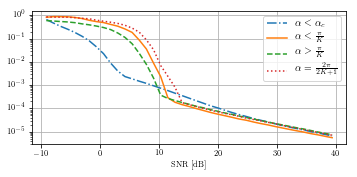

In [12]:
plt.figure(figsize=(5, 2.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(len(var_list)):
    plt.plot(SNR[idx], b_error_closest_b[i, idx], linestyles[i], label=var_names[i])
plt.xlabel('SNR [dB]')
plt.grid()
plt.legend(loc=1, fontsize=10)
plt.yscale('log')
plt.tight_layout()
plt.savefig('b_error_closest_b_all.pdf')

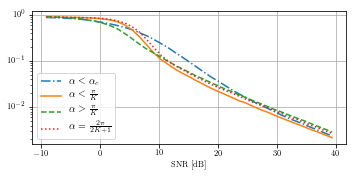

In [13]:
plt.figure(figsize=(5, 2.5))
for i in range(len(var_list)):
    plt.plot(SNR[idx], h_error_closest_h_n[i, idx], linestyles[i], label=var_names[i])
plt.xlabel('SNR [dB]')
plt.grid()
plt.legend(loc=3, fontsize=10)
plt.yscale('log')
plt.tight_layout()
plt.savefig('h_error_closest_h_n_all.pdf')

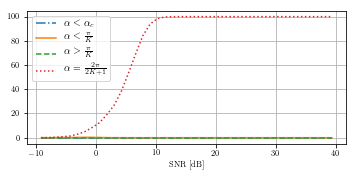

In [14]:
plt.figure(figsize=(5, 2.5))
for i in range(len(var_list)):
    plt.plot(SNR[idx], multiple_sol_cases[i, idx] / 1. / iter_max * 100, linestyles[i], label=var_names[i])
plt.xlabel('SNR [dB]')
plt.grid()
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('multiple_sol_cases_all.pdf')

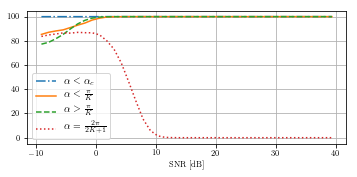

In [15]:
plt.figure(figsize=(5, 2.5))
for i in range(len(var_list)):
    plt.plot(SNR[idx], 100 - (multiple_sol_cases[i, idx] + zero_sol_cases[i, idx]) / 1. / iter_max * 100, linestyles[i], label=var_names[i])
plt.xlabel('SNR [dB]')
plt.grid()
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('single_sol_cases_all.pdf')

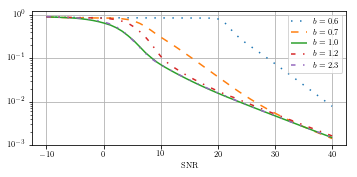

In [16]:
h_error_closest_h_n = change_b['h_error_closest_h_n']
SNR = change_b['SNR']
b_list = change_b['b_list']
linestyles = [(0, (1, 5)),
              (0, (5, 5)),
              (0, ()),
              (0, (3, 5, 1, 5)),
              (0, (3, 5, 1, 5, 1, 5))]

plt.figure(figsize=(5, 2.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
for i in range(h_error_closest_h_n.shape[0]):
    plt.plot(SNR, h_error_closest_h_n[i, :], linestyle=linestyles[i], label='$b = ' + str(np.round(b_list[i], 2)) + '$')
plt.xlabel('SNR')
plt.grid()
plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('h_error_closest_h_n_change_b_parallel.pdf')